# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [6]:
# insert your code here
#Rename DMDMARTL column to marital_status, change numeric code of entries, & constructing a frequency table for all people
da["marital_status"] = da["DMDMARTL"].replace({1:"Married", 2:"Widowed",3:"Divorced", 4:"Separated",5:"Never Married", 6:"Living with partner", 77:"Refused", 99:"Dont know" })
da["marital_status"]= da["marital_status"].fillna("missing")
da["marital_status"].value_counts(dropna = False)


Married                2780
Never Married          1004
Divorced                579
Living with partner     527
Widowed                 396
missing                 261
Separated               186
Refused                   2
Name: marital_status, dtype: int64

In [7]:
#Change numeric code of gender, filter the frequency tabe to just show male(men) entries
da["RIAGENDR"] = da["RIAGENDR"].replace({1:"Male",2:"Female"})
da[da["RIAGENDR"]== "Male"]["marital_status"].value_counts()

Married                1477
Never Married           484
Living with partner     265
Divorced                229
missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: marital_status, dtype: int64

In [8]:
#Frequency table of marital_status  filtered to women 
da[da["RIAGENDR"]== "Female"]["marital_status"].value_counts()

Married                1303
Never Married           520
Divorced                350
Widowed                 296
Living with partner     262
missing                 126
Separated               118
Refused                   1
Name: marital_status, dtype: int64

In [5]:
# Number of Married, Never married, and Divorced rates ae higher in females than males in this data
da["agegrp"].value_counts()

KeyError: 'agegrp'

In [9]:
#construct these three frequency tables using only people whose age is between 30 and 40
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
da_agegrp_30_40 = da[da["agegrp"].astype(str) == "(30.0, 40.0]"]   
da_agegrp_30_40["marital_status"].value_counts()

Married                516
Never Married          186
Living with partner    129
Divorced                67
Separated               29
Widowed                  4
Refused                  1
Name: marital_status, dtype: int64

In [10]:
da_agegrp_30_40[da_agegrp_30_40["RIAGENDR"]== "Male"]["marital_status"].value_counts()

Married                258
Never Married           89
Living with partner     72
Divorced                24
Separated               12
Widowed                  2
Refused                  1
Name: marital_status, dtype: int64

In [11]:
da_agegrp_30_40[da_agegrp_30_40["RIAGENDR"]== "Female"]["marital_status"].value_counts()

Married                258
Never Married           97
Living with partner     57
Divorced                43
Separated               17
Widowed                  2
Name: marital_status, dtype: int64

In [12]:
da_agegrp_30_40[da_agegrp_30_40["RIAGENDR"]== "Female"]["marital_status"].value_counts()

Married                258
Never Married           97
Living with partner     57
Divorced                43
Separated               17
Widowed                  2
Name: marital_status, dtype: int64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [ ]:
da.head()

In [13]:
# insert your code here
da_female = (da[da["RIAGENDR"] == "Female"]
             .loc[~da["marital_status"].isin(["missing", "Refused"]),:]
             .groupby(["agegrp"])["marital_status"].value_counts(dropna = False).unstack()
             .apply(lambda x: x/x.sum(), axis = 1)
              )
da_female

marital_status,Divorced,Living with partner,Married,Never Married,Separated,Widowed
agegrp,,,,,,
"(18, 30]",0.019892,0.206148,0.285714,0.468354,0.019892,NaN
"(30, 40]",0.090717,0.120253,0.544304,0.204641,0.035865,0.004219
"(40, 50]",0.137450,0.073705,0.573705,0.125498,0.065737,0.023904
"(50, 60]",0.176972,0.068230,0.547974,0.089552,0.057569,0.059701
"(60, 70]",0.192744,0.043084,0.480726,0.086168,0.049887,0.147392
"(70, 80]",0.143902,0.007317,0.317073,0.051220,0.019512,0.460976


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [14]:
# insert your code here
da_male = (da[da["RIAGENDR"] == "Male"]
             .loc[~da["marital_status"].isin(["missing", "Refused"]),:]
             .groupby(["agegrp"])["marital_status"].value_counts(dropna = False).unstack()
             .apply(lambda x: x/x.sum(), axis = 1)
              )
da_male

marital_status,Divorced,Living with partner,Married,Never Married,Separated,Widowed
agegrp,,,,,,
"(18, 30]",0.004237,0.201271,0.220339,0.555085,0.014831,0.004237
"(30, 40]",0.052516,0.157549,0.564551,0.194748,0.026258,0.004376
"(40, 50]",0.084788,0.082294,0.703242,0.097257,0.027431,0.004988
"(50, 60]",0.125551,0.074890,0.651982,0.103524,0.022026,0.022026
"(60, 70]",0.125858,0.050343,0.665904,0.086957,0.032037,0.038902
"(70, 80]",0.141791,0.022388,0.611940,0.022388,0.034826,0.166667


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

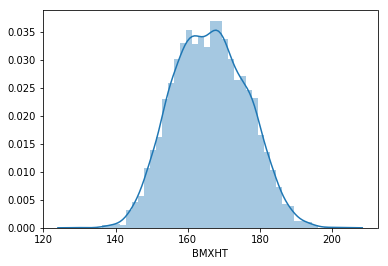

In [15]:
# insert your code here
sns.distplot(da["BMXHT"].dropna())

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

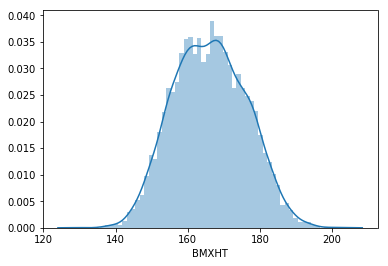

In [16]:
sns.distplot(da["BMXHT"].dropna(),bins = 60)

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

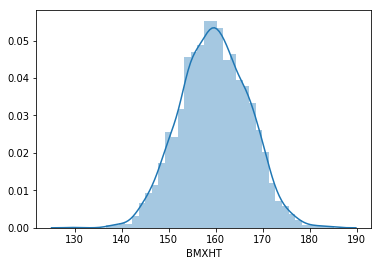

In [18]:
# insert your code here
sns.distplot(da[da["RIAGENDR"] == "Female"]["BMXHT"].dropna());

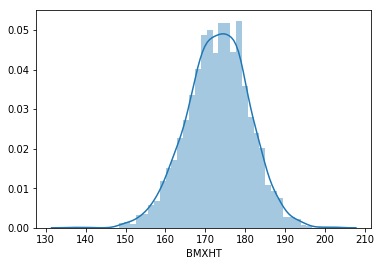

In [19]:
sns.distplot(da[da["RIAGENDR"] == "Male"]["BMXHT"].dropna());

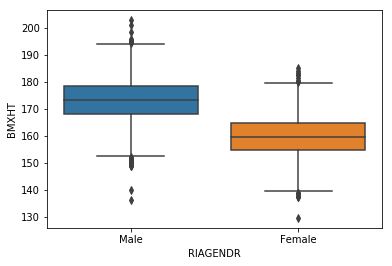

In [20]:
sns.boxplot(data = da.dropna(), y = da["BMXHT"], x = da["RIAGENDR"]);

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

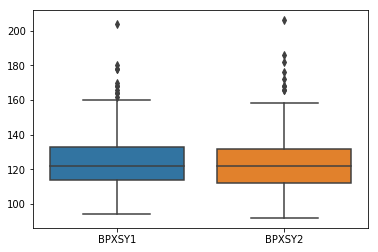

In [21]:
# insert your code here
sns.boxplot(data = da.dropna().groupby("SEQN")["BPXSY1","BPXSY2"].mean());


__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [24]:
# insert your code here
da[da["BPXSY2"] < da["BPXSY1"]]["BPXSY1"].dropna().count()/da["BPXSY1"].dropna().count()

0.4560266617293094

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

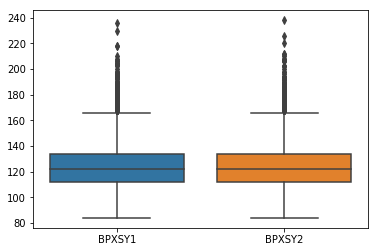

In [25]:
# insert your code here
sns.boxplot(data = da.loc[:,["BPXSY1","BPXSY2"]].dropna());

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [26]:
# insert your code here

da["DMDEDUC2x"] = (da["DMDEDUC2"].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                7: "Refused", 9: "Don't know"})
                  )
da_edu_hh = (da.loc[~da["DMDEDUC2x"].isin(["Don't know"]),:]
                 .groupby("DMDHHSIZ")["DMDEDUC2x"]
                 .value_counts().unstack()
                 .apply(lambda x:x/x.sum(), axis = 1)
 
)
da_edu_hh

DMDEDUC2x,9-11,<9,College,HS/GED,Some college/AA
DMDHHSIZ,,,,,
1,0.097656,0.093750,0.253906,0.235677,0.319010
2,0.093955,0.096583,0.312089,0.210907,0.286465
3,0.106925,0.097760,0.269857,0.206721,0.318737
4,0.111745,0.099202,0.257697,0.218928,0.312429
5,0.144838,0.149461,0.200308,0.200308,0.305085
6,0.212209,0.206395,0.116279,0.226744,0.238372
7,0.167173,0.258359,0.106383,0.246201,0.221884


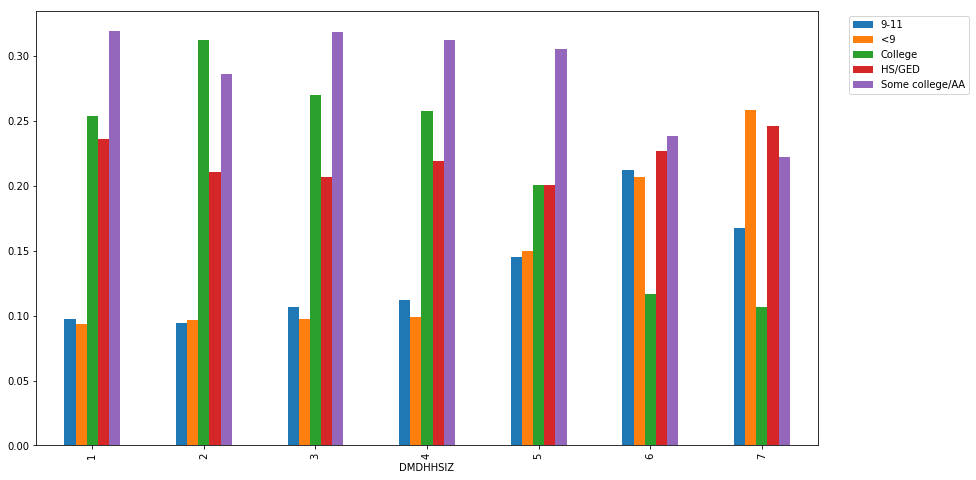

In [27]:
da_edu_hh.plot.bar(figsize = (14,8)).legend(bbox_to_anchor = (1.2,1));


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [28]:
# insert your code here

da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)].groupby(["DMDEDUC2x", "RIAGENDR"])["DMDHHSIZ"].median()


DMDEDUC2x        RIAGENDR
9-11             Female      5.0
                 Male        4.5
<9               Female      5.0
                 Male        5.0
College          Female      3.0
                 Male        3.0
HS/GED           Female      5.0
                 Male        4.0
Some college/AA  Female      4.0
                 Male        4.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [29]:
# insert your code here
da_agg_mvu = da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDR"])["BMXHT","BMXBMI","RIDAGEYR"].mean()
da_agg_mvu


BMXHT     BMXBMI   RIDAGEYR
SDMVSTRA SDMVPSU RIAGENDR                                  
119      1       Female    159.570408  30.052041  47.663265
                 Male      172.741667  26.958333  47.861111
         2       Female    159.244578  27.849398  52.987952
                 Male      172.906818  27.160465  54.363636
120      1       Female    155.402041  32.419388  43.636364
                 Male      169.537755  30.939175  43.130000
         2       Female    159.218056  27.400000  43.736111
                 Male      173.075342  27.727397  45.219178
121      1       Female    158.871579  30.856842  44.397959
                 Male      172.177885  29.416505  46.750000
         2       Female    160.229032  26.470968  44.376344
                 Male      174.764516  26.273118  42.063158
122      1       Female    161.315385  29.447436  42.897436
                 Male      173.998969  28.528866  44.653061
         2       Female    157.231111  26.611111  47.333333
                 Male      170.332323  25.744444  44.320000
123      1       Female    162.059615  29.905769  44.841121
                 Male      174.315217  29.231522  47.829787
         2       Female    160.476596  30.641489  46.457447
                 Male      174.454430  28.811392  52.126582
124      1       Female    158.788710  29.533065  51.664000
                 Male      172.109009  28.614414  50.750000
         2       Female    162.853521  28.640845  42.541667
                 Male      174.291228  27.714035  48.245614
125      1       Female    160.762385  30.385321  50.900901
                 Male      173.631092  29.727731  55.165289
         2       Female    160.021429  28.564286  51.660000
                 Male      174.456863  29.143564  49.705882
126      1       Female    160.387500  31.262500  46.229167
                 Male      175.149398  29.033333  48.416667
         2       Female    160.892000  29.612121  47.205882
                 Male      174.713043  29.039130  48.666667
127      1       Female    157.422430  32.189720  49.694444
                 Male      171.545349  31.062353  53.137931
         2       Female    159.022936  30.770642  51.486239
                 Male      173.366667  30.557831  54.070588
128      1       Female    156.339062  32.303125  55.638462
                 Male      169.325000  31.749000  53.673267
         2       Female    160.437179  27.491026  45.589744
                 Male      172.400000  26.835443  45.822785
129      1       Female    156.900000  29.019149  45.329787
                 Male      171.094318  26.493182  43.922222
         2       Female    161.034259  29.429630  43.500000
                 Male      173.138298  28.961702  45.775510
130      1       Female    161.977895  30.700000  47.810526
                 Male      176.974157  30.337079  50.516854
         2       Female    160.060577  31.490385  50.833333
                 Male      175.061224  29.237755  50.535354
131      1       Female    161.989362  30.061702  54.893617
                 Male      175.610476  28.259615  53.140187
         2       Female    161.673810  32.984127  45.000000
                 Male      175.091346  30.077885  46.778846
132      1       Female    161.508421  29.848421  43.210526
                 Male      172.534066  28.546154  42.380435
         2       Female    159.138281  30.540625  51.700000
                 Male      172.809524  28.966667  49.038760
133      1       Female    158.295122  27.959259  45.105882
                 Male      171.509722  27.495833  44.054795
         2       Female    158.627368  29.000000  47.063158
                 Male      171.179167  27.966667  47.489796

In [30]:
da_agg_mvu.max()/da_agg_mvu.min()

BMXHT       1.138815
BMXBMI      1.281213
RIDAGEYR    1.322736
dtype: float64

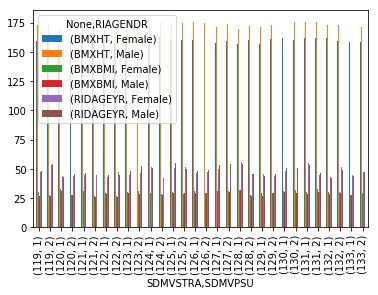

In [32]:
da_agg_mvu.unstack().plot.bar()

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [35]:
# insert your code here
(da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDR"])["BMXHT","BMXBMI","RIDAGEYR"].quantile(0.75)-
 da.groupby(["SDMVSTRA", "SDMVPSU","RIAGENDR"])["BMXHT","BMXBMI","RIDAGEYR"].quantile(0.25))

0.75                        BMXHT  BMXBMI  RIDAGEYR
SDMVSTRA SDMVPSU RIAGENDR                          
119      1       Female     9.325   9.750     31.25
                 Male       9.000   5.350     29.75
         2       Female     9.950   9.350     33.50
                 Male      11.225   5.300     29.00
120      1       Female     8.750   8.775     26.50
                 Male      12.125   9.400     23.75
         2       Female    10.550   7.750     25.75
                 Male      10.500   7.100     26.00
121      1       Female     9.150   9.000     26.25
                 Male      10.725   7.500     34.50
         2       Female     9.600   8.100     26.00
                 Male       8.600   5.700     25.50
122      1       Female    10.400   9.875     24.00
                 Male       9.400   7.700     29.50
         2       Female     7.575   8.475     25.00
                 Male      10.150   4.100     30.00
123      1       Female     9.675  10.450     30.50
                 Male       9.350   8.050     28.25
         2       Female    11.200   9.975     34.50
                 Male       9.900   8.100     31.50
124      1       Female     8.375   8.950     27.00
                 Male       9.800   6.100     32.00
         2       Female     8.650   9.000     23.50
                 Male      11.600   8.700     31.00
125      1       Female     9.100   8.000     31.00
                 Male      10.350   8.300     29.00
         2       Female    10.675  10.325     32.25
                 Male       7.925   7.900     33.50
126      1       Female     8.500  10.675     30.25
                 Male      10.450   8.000     36.25
         2       Female    12.025  10.350     31.75
                 Male       8.125   6.850     34.00
127      1       Female     7.700  11.750     27.25
                 Male       9.025   8.200     30.00
         2       Female    11.600   9.200     30.00
                 Male      10.750   5.950     28.00
128      1       Female     9.125   8.500     28.00
                 Male       9.950   6.675     33.00
         2       Female    10.650   9.375     22.00
                 Male       9.850   5.800     25.50
129      1       Female    10.375   9.500     24.75
                 Male      12.300   6.025     20.75
         2       Female     8.900   9.725     26.25
                 Male      10.700   5.800     30.75
130      1       Female     8.650  11.200     35.50
                 Male       9.900   6.700     36.00
         2       Female    10.225   8.050     30.25
                 Male       8.625   8.375     28.50
131      1       Female    10.025  11.075     35.75
                 Male      10.500   7.525     36.00
         2       Female     7.575  10.625     24.00
                 Male       7.750   7.850     28.00
132      1       Female    10.950  10.700     30.00
                 Male      10.600   6.600     21.25
         2       Female    10.100  11.750     33.00
                 Male      10.550   9.600     38.00
133      1       Female    10.300   8.300     34.00
                 Male       8.925   6.425     33.00
         2       Female     9.550   9.650     28.50
                 Male       8.850   5.900     32.25

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.